In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\temperature_pressure_data.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [3]:
df.drop(columns=["sno"],inplace=True)
print(df)

   Temperature  Pressure
0            0    0.0002
1           20    0.0012
2           40    0.0060
3           60    0.0300
4           80    0.0900
5          100    0.2700


<AxesSubplot:>

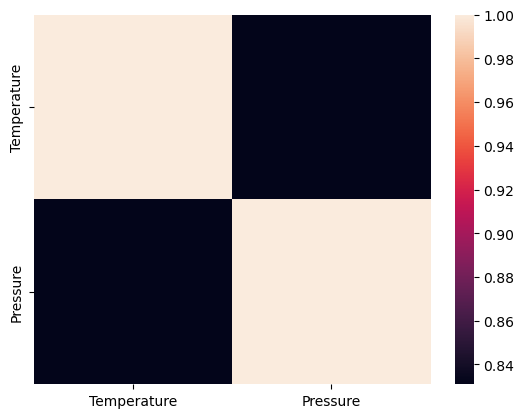

In [4]:
sns.heatmap(df.corr())

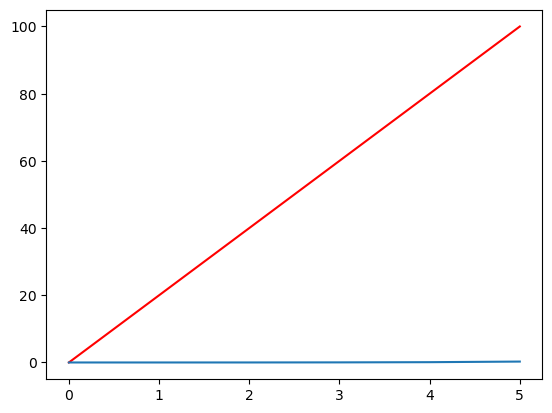

In [5]:
plt.plot(df["Temperature"],color="r")
plt.plot(df["Pressure"])

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x)
print(y)

[[  0]
 [ 20]
 [ 40]
 [ 60]
 [ 80]
 [100]]
[2.0e-04 1.2e-03 6.0e-03 3.0e-02 9.0e-02 2.7e-01]


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

array([0.27 , 0.006, 0.09 , 0.03 ])

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([-0.1992, -0.114 ])

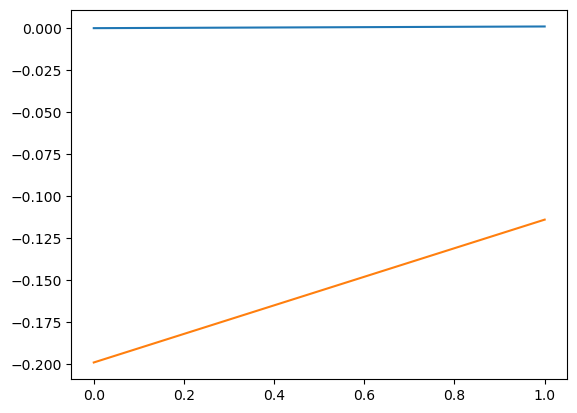

In [12]:
plt.plot(y_test)
plt.plot(y_pred)

In [13]:
from sklearn.metrics import mean_absolute_percentage_error
mpae=mean_absolute_percentage_error(y_pred,y_test)
mpae

1.0057651659268654

In [14]:
#so here huge bias
#here we use polynomial regression to optimize errors
#deg INCR features INCR errorrs DECR
#DO POLYNOMIAL REGRESSION



# POLYNOMIAL REGRESSION

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [16]:
poly.fit(x_poly,y)
model2=LinearRegression()
model2.fit(x_poly,y)
y_poly=model2.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

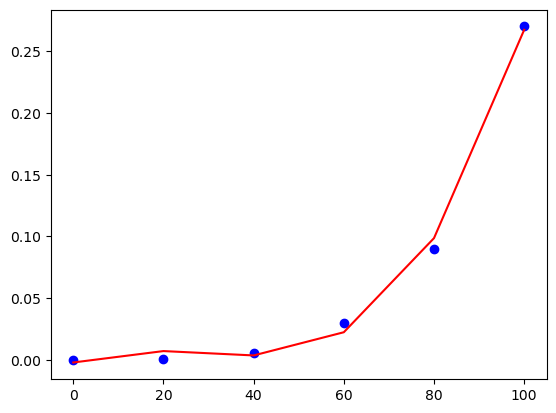

In [17]:
plt.scatter(x,y,color='b')
plt.plot(x,y_poly,color='r')

In [18]:
from sklearn.metrics import mean_absolute_percentage_error
print("Polynomial error per is",mean_absolute_percentage_error(y,y_poly))

Polynomial error per is 2.7865912208767987
